# Hola Marlon! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo Marlon! Tu notebook está muy completo y correcto, solamente debes hacer un par de correcciones al principio y revisar el cálculo del cac y el romi. Te dejé la idea general para el romi, pero si aún tienes dudas en la siguiente iteración te dejaré indicaciones más detalladas.
    
Saludos!    
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho Marlon, falta corregir un pequeño detalle en el cac y revisar la obtención del ROMI, te dejé instrucciones detalladas para ello.
    
Saludos!    
</div>

----

## Descripción del proyecto
Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

* registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar:

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

### Instrucciones para completar el proyecto
### Paso 1. Descarga los datos y prepáralos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

Rutas de archivos: 
* /datasets/visits_log_us.csv.
* /datasets/orders_log_us.csv.
* /datasets/costs_us.csv.

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Analisis exploratorio de datos

In [2]:
visitas = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv')
pedidos = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv')
gastos = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv')

## Procesamientos de datos y análisis

# Dataframe Visitas

In [3]:
#Se consulta la información del Dataframe visitas
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#Vamos a modificar los nombres de las columnas
new_col_names = []

for old_name in visitas.columns:
    # Primero, elimina los espacios al principio y al final
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_spaces)

visitas.columns = new_col_names

In [5]:
#Se vuelve a consultar donde se muestra las columnas con minúsculas y los espacios llenados con guion bajo
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
#Muestra los primeros 5 registos
visitas.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
#Se cambia formato fecha y categoría
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'])
visitas['start_ts'] = pd.to_datetime(visitas['start_ts'])
visitas['device'] = visitas['device'].astype('category')

In [8]:
#Muestra la información
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
#Indica si hay registros duplicados y ausentes
print('El número de valores duplicados del dataframe visitas son:', visitas.duplicated().sum())
print()
print('Los valores ausentes del dataframe visitas son:')
print(visitas.isna().sum())

El número de valores duplicados del dataframe visitas son: 0

Los valores ausentes del dataframe visitas son:
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


## Conclusión:
    Se modificó los nombres de las columnas a minúsculas y guion bajo. Además, se cambió los tipos de datos: end_ts y start_ts en datatime y device en category, esto hizo que el archivo tengo un peso de 11.3mb que al inicio pesaba más de 13.7mb.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, snakecase es buen estándar y los cambios a datetime y category ayudan al trabajar esta data.
</div>

# Dataframe Pedidos

In [10]:
#Se consulta la información del Dataframe pedidos
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
#Vamos a modificar los nombres de las columnas
new_col_names = []

for old_name in pedidos.columns:
    # Primero, elimina los espacios al principio y al final
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_spaces)

pedidos.columns = new_col_names

In [12]:
#Se vuelve a consultar donde se muestra las columnas con minúsculas y los espacios llenados con guion bajo
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
#Muestra los 5 primeros registros
pedidos.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
#Se cambia formato fecha
pedidos['buy_ts'] = pd.to_datetime(pedidos['buy_ts'])

In [15]:
#Muestra la información
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
#Indica si hay registros duplicados y ausentes
print('El número de valores duplicados del dataframe pedidos son:', pedidos.duplicated().sum())
print()
print('Los valores ausentes del dataframe pedidos son:')
print(pedidos.isna().sum())

El número de valores duplicados del dataframe pedidos son: 0

Los valores ausentes del dataframe pedidos son:
buy_ts     0
revenue    0
uid        0
dtype: int64


## Conclusión:
    Se modificó los nombres de las columnas a minúsculas y guion bajo. Además, se cambió el tipo de dato: buy_ts en datatime, esto hizo que el archivo tengo un peso de 1.2mb que al inicio pesaba más de 1.2mb.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

# Dataframe Gastos

In [17]:
#Se consulta la información del Dataframe gastos
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
#Muestra los 5 primeros registros
gastos.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [19]:
#Se cambia formato fecha
gastos['dt'] = pd.to_datetime(gastos['dt'])

In [20]:
#Muestra la información
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [21]:
#Indica si hay registros duplicados y ausentes
print('El número de valores duplicados del dataframe gastos son:', gastos.duplicated().sum())
print()
print('Los valores ausentes del dataframe gastos son:')
print(gastos.isna().sum())

El número de valores duplicados del dataframe gastos son: 0

Los valores ausentes del dataframe gastos son:
source_id    0
dt           0
costs        0
dtype: int64


## Conclusión:
    Se cambió el tipo de dato: dt en datatime, esto hizo que el archivo tengo un peso de 59.7kb que al inicio pesaba más de 59.7kb.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### Paso 2. Haz informes y calcula métricas

### 1. Visitas:
* ¿Cuántas personas lo usan cada día, semana y mes?

907.9917582417582


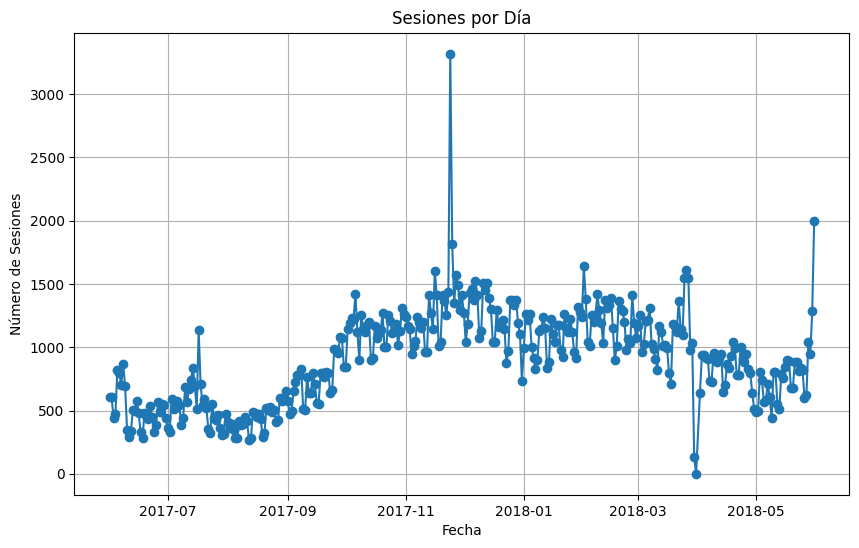

In [22]:
# ¿Cuántas personas lo usan cada día, semana y mes? 
#Numero de personas por dia
visitas['usuarios_por_dia']= visitas['start_ts'].dt.date
#print(visitas)
#print()
sessions_per_day = visitas.groupby('usuarios_por_dia')['uid'].nunique()
#print(sessions_per_day)
#print()
visitas_dia_promedio = sessions_per_day.mean()
print(visitas_dia_promedio)

#Gráfica
plt.figure(figsize=(10, 6))
sessions_per_day.plot(kind='line', marker='o', linestyle='-')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()


5716.245283018868


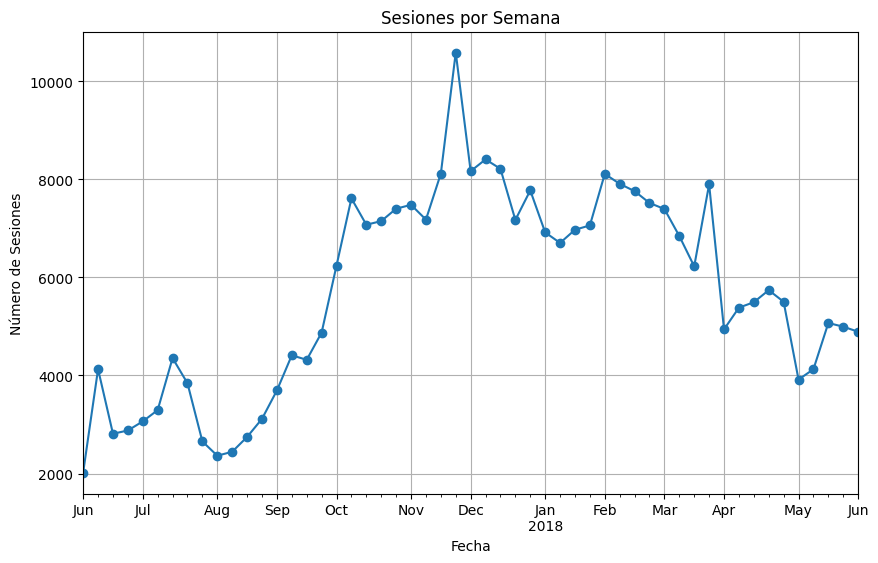

In [23]:
#Numero de personas por semana
visitas['usuarios_por_semana']= visitas['start_ts'].dt.to_period('W')
#print(visitas)
#print()
sessions_per_week = visitas.groupby('usuarios_por_semana')['uid'].nunique()
#print(sessions_per_week)
#print()
visitas_semana_promedio = sessions_per_week.mean()
print(visitas_semana_promedio)

#Gráfica
plt.figure(figsize=(10, 6))
sessions_per_week.plot(kind='line', marker='o', linestyle='-')
plt.title('Sesiones por Semana')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()


   usuario_mes_ano    uid
5           6/2017  13259
6           7/2017  14183
7           8/2017  11631
8           9/2017  18975
9          10/2017  29692
10         11/2017  32797
11         12/2017  31557
0           1/2018  28716
1           2/2018  28749
2           3/2018  27473
3           4/2018  21008
4           5/2018  20701


<Figure size 1000x600 with 0 Axes>

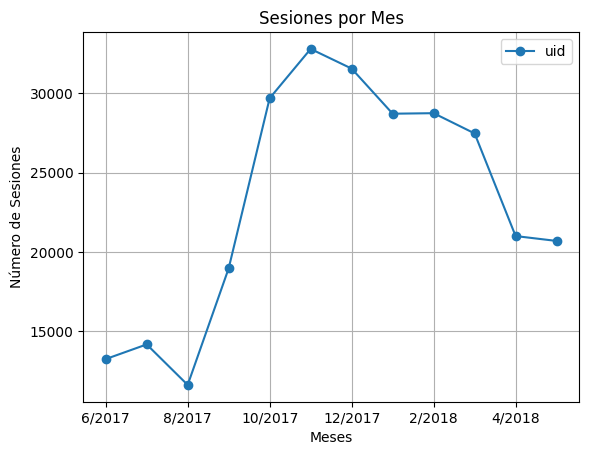

In [24]:
#Numero de personas por mes
visitas['usuarios_por_mes'] = visitas['start_ts'].dt.month
visitas['usuarios_por_ano'] = visitas['start_ts'].dt.year
#print(visitas)

sessions_per_month = visitas.groupby(['usuarios_por_mes','usuarios_por_ano'])['uid'].nunique().reset_index()
sessions_per_month_ = sessions_per_month.sort_values(by=['usuarios_por_ano','usuarios_por_mes'])
#print(sessions_per_month_)
sessions_per_month_['usuarios_por_mes'] = sessions_per_month_['usuarios_por_mes'].astype(str)
sessions_per_month_['usuarios_por_ano'] = sessions_per_month_['usuarios_por_ano'].astype(str)
sessions_per_month_['usuario_mes_ano'] = sessions_per_month_.usuarios_por_mes +'/'+ sessions_per_month_.usuarios_por_ano
sessions_per_months = sessions_per_month_[['usuario_mes_ano','uid']]

print()
print(sessions_per_months)


visitas_mes_promedio = sessions_per_month.mean()
#print(visitas_mes_promedio)

#Gráfica
plt.figure(figsize=(10, 6))
sessions_per_months.plot(kind='line', x='usuario_mes_ano', y='uid' , marker='o', linestyle='-')
plt.title('Sesiones por Mes')
plt.xlabel('Meses')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo, correctos los gráficos diarios y semanales
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Nota que el gráfico mensual no se parece al semanal y diario. Lo que ocurre es que no tiene el orden correcto de los meses, debes incluir el año para que estén los meses del 8 al 12 del 2017 primero y luego continue con los otros meses que son del 2018.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a> 
    
    Corregido
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto
</div>

* ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

usuarios_por_dia
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64
987.3626373626373


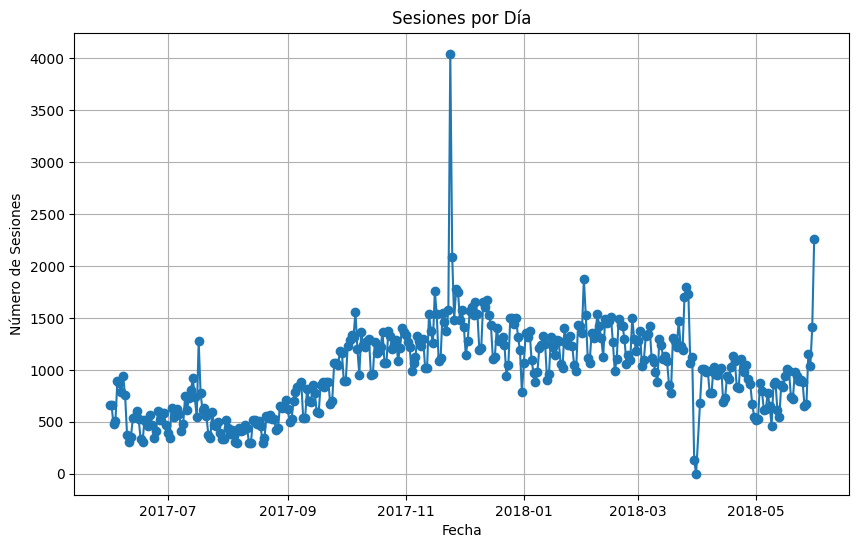

In [25]:
#Sesiones por dia
sesiones_por_dia = visitas.groupby('usuarios_por_dia').size()
print(sesiones_por_dia)
promedio_sesiones_por_dia = sesiones_por_dia.mean()
print(promedio_sesiones_por_dia)

#Gráfica
plt.figure(figsize=(10, 6))
sesiones_por_dia.plot(kind='line', marker='o', linestyle='-')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

* ¿Cuál es la duración de cada sesión?

643.506488592098



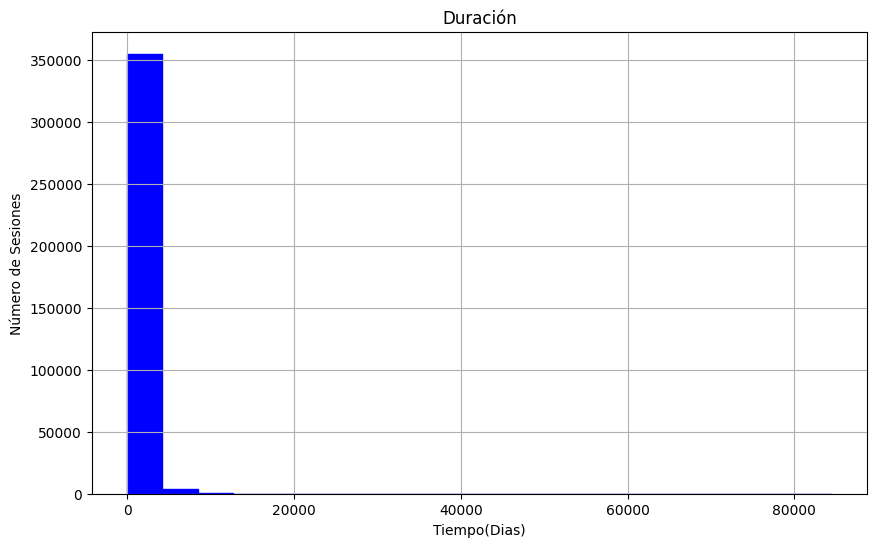

In [26]:
#Promedio de duracion de las sesiones
visitas['duracion_sesion'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds
print(visitas['duracion_sesion'].mean())
print()

#Gráfica
plt.figure(figsize=(10, 6))
plt.hist(visitas['duracion_sesion'], bins=20, color='blue', edgecolor='blue')
plt.title('Duración')
plt.xlabel('Tiempo(Dias)')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Por favor complementa con un histograma que muestre cómo distribuye esta variable
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a> 
    
    Corregido
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien
</div>

* ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [27]:
#Frecuencia de usuarios por semana y mes por factor de adherencia
sticky_wau = visitas_dia_promedio / visitas_semana_promedio
sticky_mau = visitas_dia_promedio / visitas_mes_promedio

print('El factor de adherencia de usuarios activos semanales es: ', sticky_wau)
print()
print('El factor de adherencia de usuarios activos mensuales es: ', sticky_mau)

El factor de adherencia de usuarios activos semanales es:  0.1588440861589881

El factor de adherencia de usuarios activos mensuales es:  usuarios_por_mes    139.691040
usuarios_por_ano      0.450076
uid                   0.039090
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, correcto!
</div>

### 2. Ventas:
* ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo)

,start_ts,buy_ts,tiempo_de_compra
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0.0
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95.0
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0.0
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231.0


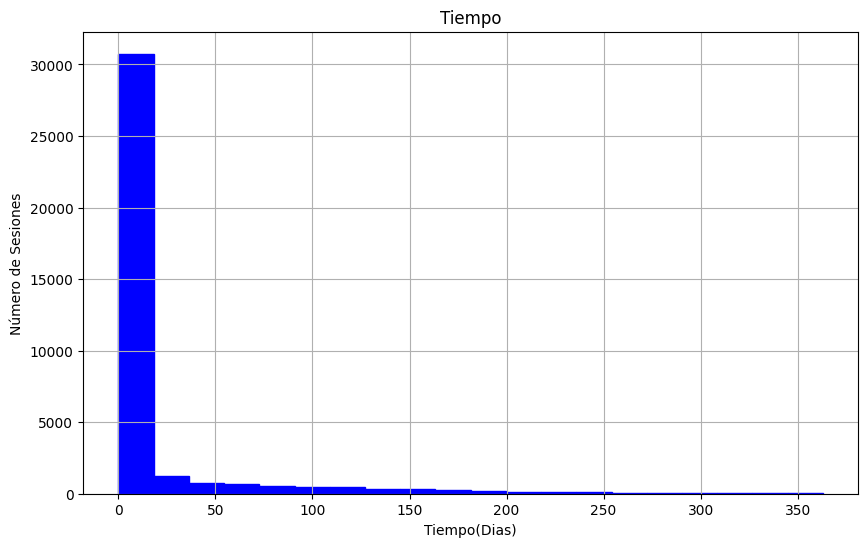

In [28]:
#Registro de la primera compra 
registro = visitas.groupby('uid')['start_ts'].min()
primeracompra = pedidos.groupby('uid')['buy_ts'].min()

#Tiempo del registro de compra
tiempo_registro_compra = merged_data = pd.merge(registro, primeracompra, on='uid')
tiempo_registro_compra['tiempo_de_compra'] = (primeracompra - registro).dt.days

#muestra el tiempo de la compra
display(tiempo_registro_compra)

#Gráfica
plt.figure(figsize=(10, 6))
plt.hist(tiempo_registro_compra['tiempo_de_compra'], bins=20, color='blue', edgecolor='blue')
plt.title('Tiempo')
plt.xlabel('Tiempo(Dias)')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, muy bien!
</div>

* ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [29]:
#Se contabiliza la cantidad de pedidos por mes 
primera_orden = pedidos['buy_ts'].min()
ultima_orden = pedidos['buy_ts'].max()

pedidos['pedidos_por_mes'] = pedidos['buy_ts'].dt.to_period('M')
pedidos_por_mes = pedidos['pedidos_por_mes'].value_counts().sort_index().reset_index()
pedidos_por_mes = pedidos_por_mes.rename(columns={'index':'fecha'})
pedidos_por_mes.columns = ['fecha','pedidos_por_mes']

display(pedidos_por_mes)

,fecha,pedidos_por_mes
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, correcto
</div>

* ¿Cuál es el tamaño promedio de compra?

In [30]:
#Calcula el promedio del tamaño de compras
tamano_promedio_compra = pedidos['revenue'].mean()   
print('Tamaño promedio de compra es: ', tamano_promedio_compra) 

Tamaño promedio de compra es:  4.999646930477041


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien
</div>

* ¿Cuánto dinero traen? (LTV)

In [31]:
#Cambiar formato a datatime
pedidos['buy_ts'] = pd.to_datetime(pedidos['buy_ts'])

#Calcular el mes de la primera compra de cada usuario
first_purchase_month = pedidos.groupby('uid')['buy_ts'].min().dt.to_period('M').reset_index()
first_purchase_month.columns = ['uid','first_purchase_month']
#print(first_purchase_month)

#Fusionar el mes de la primera compra con el dataframe pedidos
pedidos = pedidos.merge(first_purchase_month, on='uid', how='left')
#print(pedidos)

#Calcular la diferencia en meses entre el mes de compra y el mes de primera compra de usuario
pedidos['customer_age'] = (pedidos['buy_ts'].dt.to_period('M') - pedidos['first_purchase_month']).apply(lambda x: x.n)
print(pedidos)



                   buy_ts  revenue                   uid pedidos_por_mes  \
0     2017-06-01 00:10:00    17.00  10329302124590727494         2017-06   
1     2017-06-01 00:25:00     0.55  11627257723692907447         2017-06   
2     2017-06-01 00:27:00     0.37  17903680561304213844         2017-06   
3     2017-06-01 00:29:00     0.55  16109239769442553005         2017-06   
4     2017-06-01 07:58:00     0.37  14200605875248379450         2017-06   
...                   ...      ...                   ...             ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624         2018-05   
50411 2018-05-31 23:50:00     5.80  11369640365507475976         2018-05   
50412 2018-05-31 23:54:00     0.30   1786462140797698849         2018-05   
50413 2018-05-31 23:56:00     3.67   3993697860786194247         2018-05   
50414 2018-06-01 00:02:00     3.42     83872787173869366         2018-06   

      first_purchase_month  customer_age  
0                  2017-06             0  
1

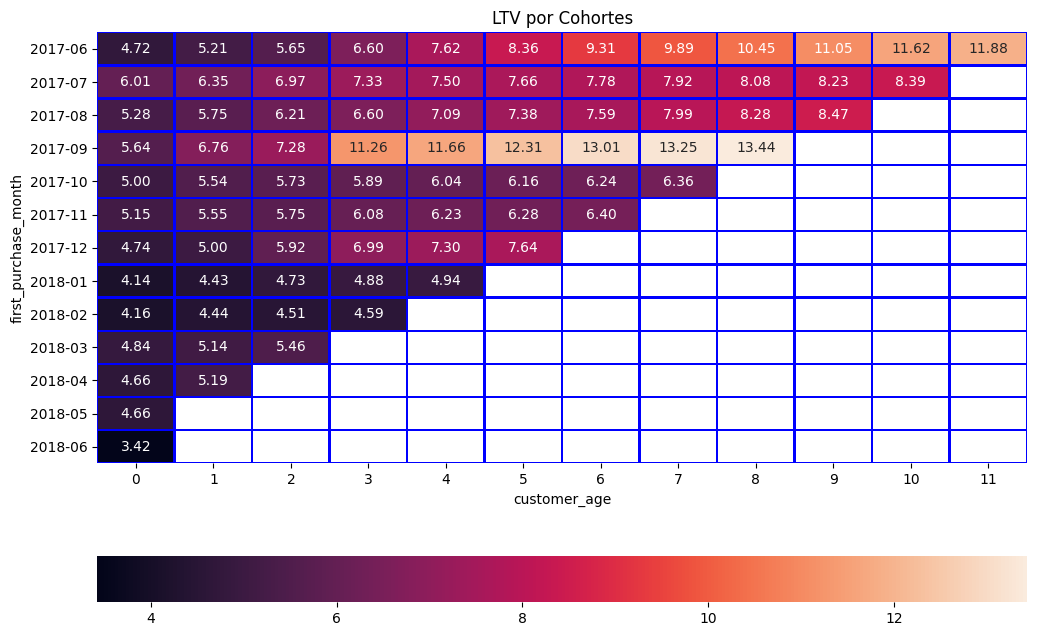

In [32]:
#Contar cuantos usuarios hay en cada cohorte
cohort_sizes = pedidos.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_purchase_month','num_customers']
#print(cohort_sizes)

#Crear la tabla LTV
ltv_table = pedidos.groupby(['first_purchase_month','customer_age'])['revenue'].sum().reset_index()
#print(ltv_table)

#Hacer merge con la tabla que cuenta cuantas usuario hay por cohortes
ltv_table = ltv_table.merge(cohort_sizes, on='first_purchase_month')
#print(ltv_table)

#Calcular LTV
ltv_table['ltv'] = ltv_table['revenue'] / ltv_table['num_customers']
#print(ltv_table)

#Transformar a tabla pivote
ltv_table_pivot = ltv_table.pivot_table(
    index='first_purchase_month',
    columns='customer_age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)
#print(ltv_table_pivot)

#Mostrar con heatmap 
ltv_table_pivot.index = ltv_table_pivot.index.astype(str)
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_table_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='blue', cbar_kws={'orientation':'horizontal'}).set(title='LTV por Cohortes')
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien hecho, el ltv está perfecto
</div>

### 3. Marketing:
* ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [33]:
#gastos.info()
gastos['month'] = gastos['dt'].dt.to_period('M')
gastos_ = gastos.groupby('source_id')['costs'].sum()
print('Gastos por fuente de adquisisión: ')
print(gastos_)

Gastos por fuente de adquisisión: 
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


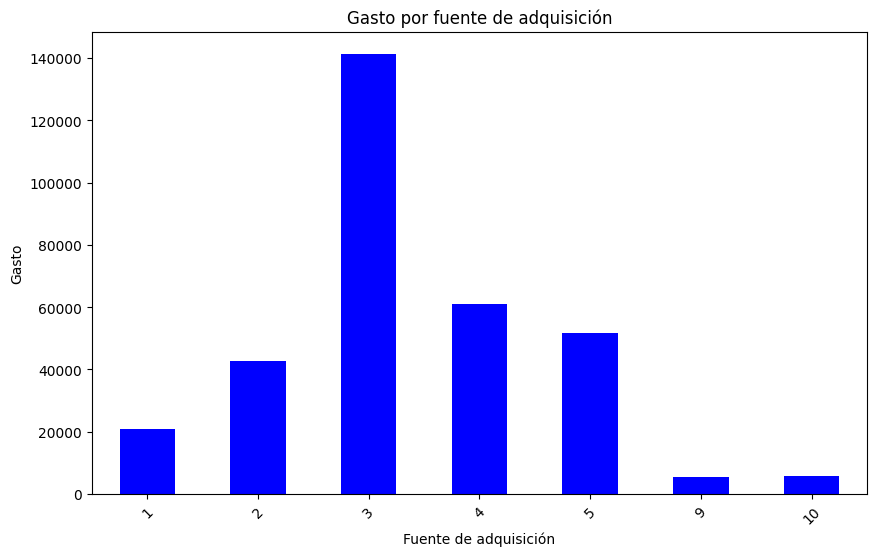

In [34]:
#Gráfica
plt.figure(figsize=(10, 6))
gastos_.plot(kind='bar', color='blue')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Gasto')
plt.title('Gasto por fuente de adquisición')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

* ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [ ]:
#Ejemplos
#18445407535914413204
#1575281904278712
#2551852515556206

#Extraer la fecha de 'start_ts' en visitas
visitas['date'] = visitas['start_ts'].dt.date
#print(visitas['date'])

#Obtener la primera visita por usuario
sort_visit = visitas.sort_values(['uid','start_ts'])
first_visit = sort_visit.groupby('uid').first().reset_index()
#print(first_visit[first_visit['uid'] == 18445407535914413204])
#print()

# Contar usuarios únicos adquiridos
mrg_first = first_visit.merge(pedidos, on='uid')
mrg_sort_first = mrg_first.sort_values(['uid','buy_ts'])
customers_per = mrg_sort_first.groupby('uid').first().reset_index()
customers_per_source_day = customers_per.groupby(['source_id', 'date'])['uid'].nunique().reset_index(name='unique_users')
#print(customers_per_source_day[customers_per_source_day['uid'] == 18445407535914413204])

# Convertir la columna 'dt' en gastos a formato datetime
gastos['dt'] = pd.to_datetime(gastos['dt']).dt.date
#print(gastos.info())

# Sumar los costos diarios por fuente en gastos
spent_per_source_day = gastos.groupby(['source_id', 'dt'])['costs'].sum().reset_index()
#print(spent_per_source_day)

# Unir los datos de usuarios únicos y costos diarios
merged_df = pd.merge(customers_per_source_day, spent_per_source_day, left_on=['source_id', 'date'], right_on=['source_id', 'dt'])
#print(merged_df)

# Calcular el costo de adquisición por cliente diario por fuente
merged_df['adquisition_cost_per_customer'] = merged_df['costs'] / merged_df['unique_users']
#print(merged_df)

adquisition = merged_df[['source_id', 'date', 'adquisition_cost_per_customer']]
print("Costo de adquisición por cliente diario para cada fuente:")
print(adquisition)


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Hay un par de cosas a corregir, te comento
    
    first_visit = visitas.groupby(['uid', 'source_id', 'date']).first().reset_index()
    
Al grupar por uid, source y date, para luego seleccionar first(), no selecciona la primera visita en general del usuario, sino que selecciona su primera visita para ese source y esa fecha. Debes agrupar solamente por uid
    
    customers_per_source_day = first_visit.groupby(['source_id', 'date'])['uid'].nunique().reset_index(name='unique_users')
    
Por otro lado, para contar los customers, debes considerar solamente aquellos que fueron adquiridos, es decir, es aquellos que hicieron como mínimo una compra.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a> 
    
    Corregido
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Falta modificar el conteo de usuarios, solamente se deben contar los usuarios que han hecho alguna compra. Esto lo puedes hacer con `isin()`, donde pones como condición que el id de usuario aparezca en la tabla ordenes o puedes hacer un inner join con un dataframe que tiene los uid únicos que han comprado.
    
Por otro lado, después de obtener el cac diario, promedio por fuente los cac diario y obtén un cac general para cada fuente    
</div>

In [ ]:
#Gráfica
plt.figure(figsize=(10, 6))
adquisition.plot(kind='bar', color='GREEN')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Costo de adquisición por cliente')
plt.title('Costo de adquisición por cliente para cada fuente')
plt.xticks(rotation=0)
plt.show()

* ¿Cuán rentables eran las inversiones? (ROMI)

In [ ]:
visitas

In [ ]:
#Contar cuantas ganancias por cada fuente
users_visit = pedidos.merge(visitas, on='uid', how='inner')
user_visit_source = users_visit.groupby('source_id')['revenue'].sum().reset_index()
user_visit_source.columns = ['source','revenue']
#print(user_visit_source)

#Contar cuantos clientes visitaron por cada fuente
users_visit = visitas.groupby('source_id')['uid'].nunique().reset_index()
users_visit.columns = ['source','num_customers']
#print(users_visit)

#Contar los CAC por fuente
#print(adquisition)
cac_source = adquisition.groupby('source_id')['adquisition_cost_per_customer'].sum().reset_index()
cac_source.columns = ['source','cac']
#print(cac_source)

#Tomar el número de la fuente
source = user_visit_source['source']

#Calcular ltv por fuente
ltv_source = user_visit_source['revenue'] / users_visit['num_customers']
#print(source)

#Calcular romi
romi = ltv_source / cac_source['cac']
#print(romi)

#Transformar la serie a un dataframe
romi_df = pd.concat([source, romi], axis='columns')
romi_df.columns = ['source_id','romi']
print(romi_df)

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El romi se calcula como ltv/cac de cada fuente. Para cada fuente, con solo sus usuarios que entraron a través de dicha fuente, calculas el ltv y usas el cac de la fuente que se calculó en la sección pasada para calcular el romi. El cálculo del ltv aquí es el mismo que la de la sección del ltv pero con solamente la data de usuarios de una source.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a> 
    
    Corregido
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Debes calcular el ltv tal como se calculó en la sección del ltv (al final de la parte de venta).
    
Te orientaré para esta parte:
    
- Debes tener para cada usuario su source de primera visita, mes de primera compra y todas sus compras. Es decir, una tabla con una fila para cada compra y en cada fila tener el source de la 1era visita y mes de 1era compra del usuario correspondiente.
   - Este primer dataframe lo puedes obtener obteniendo la primera visita de cada usuario, eso te da la source de la primera visita
   - Luego obtén la fecha de primera compra para cada usuario
   - Haz un par de left joins para unir esta data a orders, así tendrás lo requerido
  
    
- Debes hacer un loop sobre las source. 
  - Supongamos estamos iterando sobre la source i.
  - Filtra la tabla por la source i, de manera que solamente te quedan los usuarios que llegaron por la source i.
  - Con esta data filtrada, calcular el tamaño inicial de cada cohorte y por otro lado, el revenue por mes de cada cohorte (hay que agregar la edad si aún no estaba calculada)
  - Con eso calculamos un revenue por comprador de cada mes para cada cohorte
  - Además, obtén los costos mensuales de la source i y únelos como mes de primera orden = mes de gasto
  - Así, tendremos ltv=revenue/tamaño cohorte y cac=gasto/tamaño cohorte
  - Finalmente ROMI = ltv/cac
  - Presenta esto en una tabla pivote, similara como se presentó el ltv
</div>

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=romi_df, x='source_id', y='romi', palette='viridis')
plt.xlabel('Source Id')
plt.ylabel('ROMI')
plt.title('ROMI por fuente de tráfico')
plt.axhline(color='r', linestyle='--')
plt.legend()
plt.show()

# Conclusión

De acuerdo a los resultados de las gráficas vemos que las fuentes 1 y 2 tiene ROMI con tasa alta y CAC con tasa baja. Esto indica las fuentes estan generando clientes a un costo más bajo y con un retorno más alto en comparación con otras fuentes.
Por lo tanto, se sugiere aplicar las siguientes estrategias:
* Revisar y Optimizar Estrategias de Marketing
* Mejorar la Retención de Clientes
* Aumentar el Valor de Vida del Cliente (LTV)